# Digit Recogniser using Convolutional Neural Network


In this workshop we are going a develop and train a deep neural network called convolutional neural network to recognise handwritten digits. We'll be using the MNIST ("Modified National Institute of Standards and Technology") dataset, also considered as the "Hello World" dataset in computer vision/deep learning. It contains a large set of human handwritten and annotated digit images.

By the end of the tutorial you will have learnt how convolutional neural networks work, how to deploy pre-trained model, how to visualise the results. We'll build this neural net using tensorflow and deploy the pretrained model as rest api.

## Libraries and Verify TensorFlow is Installed

We'll start of by first importing the libraries that are required for this project. The Deep learning framework we are using is tensorflow. This is even to check if the correct version of tensorflow is installed.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
from distutils.version import LooseVersion
import warnings

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer'
print('TensorFlow Version: {}'.format(tf.__version__))

%matplotlib inline

TensorFlow Version: 1.3.0


## MNIST Data Set

MNIST Data Set is a collection of handwritten digits images comprising 60,000 training images and 10,000 test images. It usually used as a benchmark for the new computer vision and pattern recognition algorithms. The images here have been size-normalised and centered in fixed size image.

Tensorflow has a module which helps us download this particular dataset, split it into training set, validation set, test set and creates one-hot vectors for labels of each image. The training set contains 55,000 images, validation set has 5,000 and test set has 10,000 images.

**So why is it important to separate data into 3 sets?**

These images here are 2D images each consisting an array of 28x28 values that have been flattened to get a rich structure of 784 dimensional vector space

In [2]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
print("No. of Training Examples : ",mnist.train.num_examples)
print("No. of Validation Examples : ",mnist.validation.num_examples)
print("No. of Test Examples : ",mnist.test.num_examples)
print("Example of a one-hot encoded vector : \n",mnist.train.labels[0])
print("Flattened Image Shape : ", mnist.train.images[0].shape)
print("Example of a flattened image: \n", mnist.train.images[0])

No. of Training Examples :  55000
No. of Validation Examples :  5000
No. of Test Examples :  10000
Example of a one-hot encoded vector : 
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
Flattened Image Shape :  (784,)
Example of a flattened image: 
 [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          

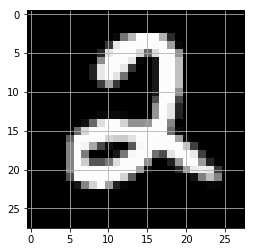

In [4]:
img_array = mnist.train.images[np.random.randint(mnist.train.images.shape[0])]
img_array = 255 * img_array
img_array = img_array.astype("uint8")
#print(img_array.reshape([28,28]))
plt.imshow(img_array.reshape([28,28]))
plt.gray()
plt.grid(True)
plt.savefig('test.png')

## Build our network

You'll have to build the necessary components given below alongwith us for designing the convolutional neural network.
- `input_placeholders`
- `init_weights_bias`
- `conv2d`
- `max_pool`
- `flatten`
- `fcn`
- `output`
- `cnn`

## Inputs

Write Something about the 4 placeholders

In [5]:
def input_placeholders():
    """
    Create TF placeholders for inputs, targets, keep_prob, learning_rate
    Return: A Tuple(inputs, targets, keep_prob, learning_rate)
    """
    inputs = tf.placeholder(tf.float32, shape=[None, 784], name="Inputs")
    targets = tf.placeholder(tf.float32, shape=[None, 10], name="Labels")
    keep_prob = tf.placeholder(tf.float32, name="keep_prob")
    learning_rate = tf.placeholder(tf.float32, name="learning_rate")
    
    return inputs, targets, keep_prob, learning_rate

## Initialise Weights and Bias

In [6]:
def init_weights_bias(w_shape, b_shape):
    """
    
    """
    weights = tf.Variable(tf.truncated_normal(w_shape, stddev=0.1), name="weights")
    bias = tf.Variable(tf.truncated_normal(b_shape), name="bias")
    return weights, bias

## Convolutional Layer


In [7]:
def conv2d(inputs, weights, stride):
    """
    Apply convolution operation to inputs tensor.
    inputs: tensorflow tensor
    weights: weights initialised for convolution operation
    stride: 2d tuple for convolution
    """
    return tf.nn.conv2d(inputs, weights, strides=[1,stride[0], stride[1], 1],name="conv" ,padding="SAME")

## Max Pooling Layer

In [8]:
def max_pool(inputs, kernel_size, stride):
    """
    Apply max pooling operation to inputs tensor.
    inputs: tensorflow tensor
    kernel_size: 2d tuple for pooling
    stride: 2d tuple for pooling
    """
    return tf.nn.max_pool(inputs, ksize=[1, kernel_size[0],kernel_size[1],1], 
                          strides=[1, stride[0], stride[1], 1], padding="SAME", name="max_pool")

## Flatten Layer

In [9]:
def flatten(inputs):
    """
    Flatten inputs tensor to (batch_size, flattened_image_size).
    """
    shape_ip = inputs.get_shape().as_list()
    return tf.reshape(inputs,[-1, shape_ip[1] * shape_ip[2] * shape_ip[3]])

## Fully Connected Layer

In [10]:
def fcn(inputs, num_outputs):
    """
    Apply a fully connected layer to inputs tensor using weights and bias
    inputs: tensorflow tensor
    num_outputs: number of outputs the new tensor should be.
    """
    weights = tf.Variable(tf.truncated_normal([inputs.get_shape().as_list()[1], num_outputs], stddev=0.1), name="weights")
    bias = tf.Variable(tf.truncated_normal([num_outputs]), name="bias")
    
    fc = tf.add(tf.matmul(inputs, weights), bias)
    fc = tf.nn.relu(fc)
    
    tf.summary.histogram("weights", weights)
    tf.summary.histogram("biases", bias)
    tf.summary.histogram("activations", fc)
    return fc

## Output Layer

In [11]:
def outputs(inputs, num_outputs):
    """
    Apply an output layer to inputs tensor using weights and bias
    inputs: tensorflow tensor
    num_outputs: number of outputs the new tensor should be.
    """
    weights = tf.Variable(tf.truncated_normal([inputs.get_shape().as_list()[1], num_outputs], stddev=0.1), name="weights")
    bias = tf.Variable(tf.truncated_normal([num_outputs]), name="weights")
    outputs = tf.add(tf.matmul(inputs, weights), bias, name="outputs")
    
    tf.summary.histogram("weights", weights)
    tf.summary.histogram("biases", bias)
    tf.summary.histogram("activations", outputs)
    
    return outputs

## Create Convolutional Model

In [12]:
def cnn(inputs, keep_prob):
    """
    Create a convolutional model using inputs tensor and use keep_prob while applying dropout 
    """
    inputs = tf.reshape(inputs, [-1, 28, 28, 1])
    
    tf.summary.image('input', inputs, 3)
    
    #Conv layer 1
    with tf.name_scope("conv_1"):
        wc1, bc1 = init_weights_bias([5, 5, 1, 32], [32])
        c1 = conv2d(inputs, wc1, [1,1])+bc1
        r1 = tf.nn.relu(c1)
        m1 = max_pool(r1, [2,2], [2,2])
    
    #Conv layer 2
    with tf.name_scope("conv_2"):
        wc2, bc2 = init_weights_bias([5,5,32,64],[64])
        c2 = conv2d(m1, wc2, [1,1])+bc2
        r2 = tf.nn.relu(c2)
        m2 = max_pool(r2, [2,2], [2,2])
    
    #Flatten the output of last conv layer
    flat_m2 = flatten(m2)
    
    #Fully connected layer
    with tf.name_scope("fc1"):
        fcn1 = fcn(flat_m2, 1024)
    
    #Dropout
    drp1 = tf.nn.dropout(fcn1, keep_prob)
    
    #Output layer
    with tf.name_scope("output_fc_layer"):
        out = outputs(drp1, 10)
    return out

## Display Stats

In [15]:
def display_stats(sess, batch_train, batch_train_labels, batch_val, batch_val_labels, cost, accuracy, writer, step):
    """
    Display intermediate results.
    """
    train_data = sess.run([accuracy, summ, cost], feed_dict={
        inputs: batch_train, targets: batch_train_labels, keep_prob: 1.0, learning_rate:0.0001})
    val_data =sess.run([accuracy, cost], feed_dict={
        inputs: batch_val, targets: batch_val_labels, keep_prob: 1.0, learning_rate:0.0001})
    
    writer.add_summary(train_data[1])
    
    print("Step {} Train_Loss : {:>10.4f} Train_Accuracy : {:.6f} Val_Loss : {:>10.4f} Val_Accuracy : {:.6f}"
         .format(step, train_data[2], train_data[0], val_data[1], val_data[0]))
    return

## Construct graph

In [16]:
tf.reset_default_graph()

#Initialise Session
sess = tf.Session()

#Inputs
inputs, targets, keep_prob, learning_rate = input_placeholders()

#Model
logits = cnn(inputs, keep_prob)

#Loss Function
with tf.name_scope("Loss_Function"):
    cross_entropy = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(labels=targets, logits=logits))
    tf.summary.scalar("loss", cross_entropy)

#Optimizer
with tf.name_scope("Optimizer"):
    train_step = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cross_entropy)

# Report Accuracy
with tf.name_scope("Accuracy"):
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(targets, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    tf.summary.scalar("Accuracy", accuracy)

#Define variable to save summaries
summ = tf.summary.merge_all()

#Initialise all variables
sess.run(tf.global_variables_initializer())

#Create a saver object to save the model
saver = tf.train.Saver()

#Write Graph to Tensorboard
!rm -r log/
writer = tf.summary.FileWriter("log/")
writer.add_graph(sess.graph)

## Start Training

In [17]:
for i in range(20000):
    batch = mnist.train.next_batch(50)
    if i % 100 == 0:
        display_stats(sess, batch[0], batch[1], mnist.validation.images, mnist.validation.labels, 
                      cross_entropy, accuracy, writer, i)
        saver.save(sess, 'trained/test_model')
    sess.run(train_step,feed_dict={inputs: batch[0], targets: batch[1], keep_prob: 0.5, learning_rate:0.0001})

print('\nTest accuracy : {}'.format(sess.run(accuracy,feed_dict={
    inputs: mnist.test.images, targets: mnist.test.labels, keep_prob: 1.0, learning_rate:0.0001})))

sess.close()

Step 0 Train_Loss :    32.3006 Train_Accuracy : 0.120000 Val_Loss :    30.4499 Val_Accuracy : 0.097600
Step 100 Train_Loss :     0.8387 Train_Accuracy : 0.720000 Val_Loss :     0.8054 Val_Accuracy : 0.742200
Step 200 Train_Loss :     0.6210 Train_Accuracy : 0.780000 Val_Loss :     0.5171 Val_Accuracy : 0.843800
Step 300 Train_Loss :     0.4699 Train_Accuracy : 0.840000 Val_Loss :     0.4126 Val_Accuracy : 0.889400
Step 400 Train_Loss :     0.4179 Train_Accuracy : 0.880000 Val_Loss :     0.3483 Val_Accuracy : 0.905600
Step 500 Train_Loss :     0.2449 Train_Accuracy : 0.960000 Val_Loss :     0.3157 Val_Accuracy : 0.914800
Step 600 Train_Loss :     0.1916 Train_Accuracy : 0.980000 Val_Loss :     0.2830 Val_Accuracy : 0.920600
Step 700 Train_Loss :     0.2709 Train_Accuracy : 0.920000 Val_Loss :     0.2608 Val_Accuracy : 0.929400
Step 800 Train_Loss :     0.1990 Train_Accuracy : 0.960000 Val_Loss :     0.2323 Val_Accuracy : 0.936600
Step 900 Train_Loss :     0.1322 Train_Accuracy : 0.96000

Step 7800 Train_Loss :     0.0603 Train_Accuracy : 0.980000 Val_Loss :     0.0441 Val_Accuracy : 0.986800
Step 7900 Train_Loss :     0.0075 Train_Accuracy : 1.000000 Val_Loss :     0.0478 Val_Accuracy : 0.986000
Step 8000 Train_Loss :     0.0419 Train_Accuracy : 0.980000 Val_Loss :     0.0478 Val_Accuracy : 0.985800
Step 8100 Train_Loss :     0.0407 Train_Accuracy : 0.980000 Val_Loss :     0.0463 Val_Accuracy : 0.985200
Step 8200 Train_Loss :     0.0109 Train_Accuracy : 1.000000 Val_Loss :     0.0489 Val_Accuracy : 0.986400
Step 8300 Train_Loss :     0.0147 Train_Accuracy : 1.000000 Val_Loss :     0.0444 Val_Accuracy : 0.986600
Step 8400 Train_Loss :     0.0345 Train_Accuracy : 0.980000 Val_Loss :     0.0457 Val_Accuracy : 0.986000
Step 8500 Train_Loss :     0.0358 Train_Accuracy : 0.980000 Val_Loss :     0.0477 Val_Accuracy : 0.984800
Step 8600 Train_Loss :     0.0963 Train_Accuracy : 0.940000 Val_Loss :     0.0462 Val_Accuracy : 0.985800
Step 8700 Train_Loss :     0.1218 Train_Accura

Step 15500 Train_Loss :     0.0013 Train_Accuracy : 1.000000 Val_Loss :     0.0354 Val_Accuracy : 0.989400
Step 15600 Train_Loss :     0.0009 Train_Accuracy : 1.000000 Val_Loss :     0.0368 Val_Accuracy : 0.989200
Step 15700 Train_Loss :     0.0097 Train_Accuracy : 1.000000 Val_Loss :     0.0323 Val_Accuracy : 0.990200
Step 15800 Train_Loss :     0.0003 Train_Accuracy : 1.000000 Val_Loss :     0.0330 Val_Accuracy : 0.990200
Step 15900 Train_Loss :     0.0013 Train_Accuracy : 1.000000 Val_Loss :     0.0334 Val_Accuracy : 0.990400
Step 16000 Train_Loss :     0.0096 Train_Accuracy : 1.000000 Val_Loss :     0.0331 Val_Accuracy : 0.991000
Step 16100 Train_Loss :     0.0026 Train_Accuracy : 1.000000 Val_Loss :     0.0338 Val_Accuracy : 0.989800
Step 16200 Train_Loss :     0.0008 Train_Accuracy : 1.000000 Val_Loss :     0.0381 Val_Accuracy : 0.988400
Step 16300 Train_Loss :     0.0020 Train_Accuracy : 1.000000 Val_Loss :     0.0392 Val_Accuracy : 0.988000
Step 16400 Train_Loss :     0.0417 Tr

## Prediction using the Trained model

INFO:tensorflow:Restoring parameters from ./trained/test_model
3


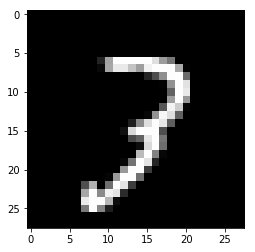

In [3]:
sess = tf.Session()

saver=tf.train.import_meta_graph('trained/test_model.meta')
saver.restore(sess, tf.train.latest_checkpoint('./trained/'))

graph = tf.get_default_graph()

output = graph.get_tensor_by_name("output_fc_layer/outputs:0")

inputs = graph.get_tensor_by_name("Inputs:0")
targets = graph.get_tensor_by_name("Labels:0")
keep_prob = graph.get_tensor_by_name("keep_prob:0")
learning_rate = graph.get_tensor_by_name("learning_rate:0")

pred = tf.nn.softmax(output)
img_predict_index = np.random.randint(mnist.test.images.shape[0])
img_array = 255 * mnist.test.images[img_predict_index]
img_array = img_array.astype("uint8")
plt.imshow(img_array.reshape([28,28]))
plt.gray()

predictions = sess.run(pred, feed_dict={inputs:mnist.test.images[img_predict_index].reshape(1,784), 
                                        targets: mnist.test.labels[img_predict_index].reshape(1,10), 
                                        keep_prob:1.0, learning_rate:0.0001})

print(np.argmax(predictions[0]))


sess.close()